In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import  StratifiedKFold
from sklearn.base import  clone
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [ ]:
train_data  = pd.read_csv("../data/train.csv")
train_data
test_data = pd.read_csv("../data/test.csv")

In [ ]:
y_train = train_data.iloc[:, 0]
y_train
y_test = test_data.iloc[:, 0]

In [34]:
X_train = train_data.iloc[:, 1:]
X_test = test_data.iloc[:,1:]


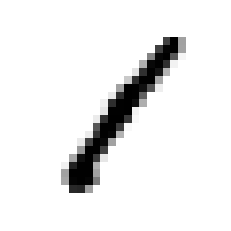

In [20]:
some_digit = X_train.iloc[0, :]
sd_arr = some_digit.to_numpy()
sdigit_image = sd_arr.reshape(28,28)

plt.imshow(sdigit_image, cmap="binary")
plt.axis("off")
plt.show()

In [21]:
type(y_train[0])


numpy.int64

In [28]:
y_train_5 =(y_train == 5)
y_test_5 = (y_test == 5)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

print(y_train_5)
sgd_clf.predict([X_train.iloc[3]])
print(y_train)

0        False
1        False
2        False
3        False
4        False
         ...  
41995    False
41996    False
41997    False
41998    False
41999    False
Name: label, Length: 42000, dtype: bool
0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


In [37]:
skfolds = StratifiedKFold(n_splits= 3, shuffle=True, random_state =42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.loc[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train.loc[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct= sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

0.9576428571428571
0.9667857142857142
0.9258571428571428


In [41]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

confusion_matrix(y_train_5, y_train_pred)

array([[37781,   424],
       [ 1139,  2656]], dtype=int64)